In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

In [19]:
df_x = pd.read_csv("D://Uni//11 semester//c++//ParticleMethod//MPI_particle_project//output//particles_list_x.txt", sep=",", header=None)
df_y = pd.read_csv("D://Uni//11 semester//c++//ParticleMethod//MPI_particle_project//output//particles_list_y.txt", sep=",", header=None)

In [20]:
df_x = df_x.dropna(axis='columns')
df_y = df_y.dropna(axis='columns')

In [21]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,404,405,406,407,408,409,410,411,412,413
0,1,0,0,0,0,0,0,0,0,0,...,61.0000,63.0000,63.0000,63.00000,65.0000,65.0000,65.0000,67.0000,67.0000,67.0000
1,2,0,0,0,0,0,0,0,0,0,...,60.0000,62.0000,62.0000,62.00000,64.0000,64.0000,64.0000,66.0000,66.0000,66.0000
2,3,0,0,0,0,0,0,0,0,0,...,59.0000,61.0000,61.0000,61.00000,63.0000,63.0000,63.0000,65.0000,65.0000,65.0000
3,4,0,0,0,0,0,0,0,0,0,...,58.0000,60.0000,60.0000,60.00000,62.0000,62.0000,62.0000,64.0000,64.0000,64.0000
4,5,0,0,0,0,0,0,0,0,0,...,57.0000,59.0000,59.0000,59.00000,61.0000,61.0000,61.0000,63.0000,63.0000,63.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,0,0,0,0,0,0,0,0,...,-11.6202,21.5058,21.5058,-4.69229,19.9757,19.9772,15.9485,19.7663,19.7663,30.7826
76,77,0,0,0,0,0,0,0,0,0,...,-12.7490,21.4771,21.4771,-5.57896,20.1146,20.1167,16.1636,19.6600,19.6600,30.7824
77,78,0,0,0,0,0,0,0,0,0,...,-13.8777,21.4483,21.4483,-6.46562,20.2224,20.2189,16.4284,19.5602,19.5602,30.7822
78,79,0,0,0,0,0,0,0,0,0,...,-15.0065,21.4195,21.4195,-7.35228,20.3004,20.2788,16.6834,19.5150,19.5150,30.7819


In [22]:
# np.array(df_x.iloc[0,1:])

In [23]:
# np.array(df_x.iloc[:,0])

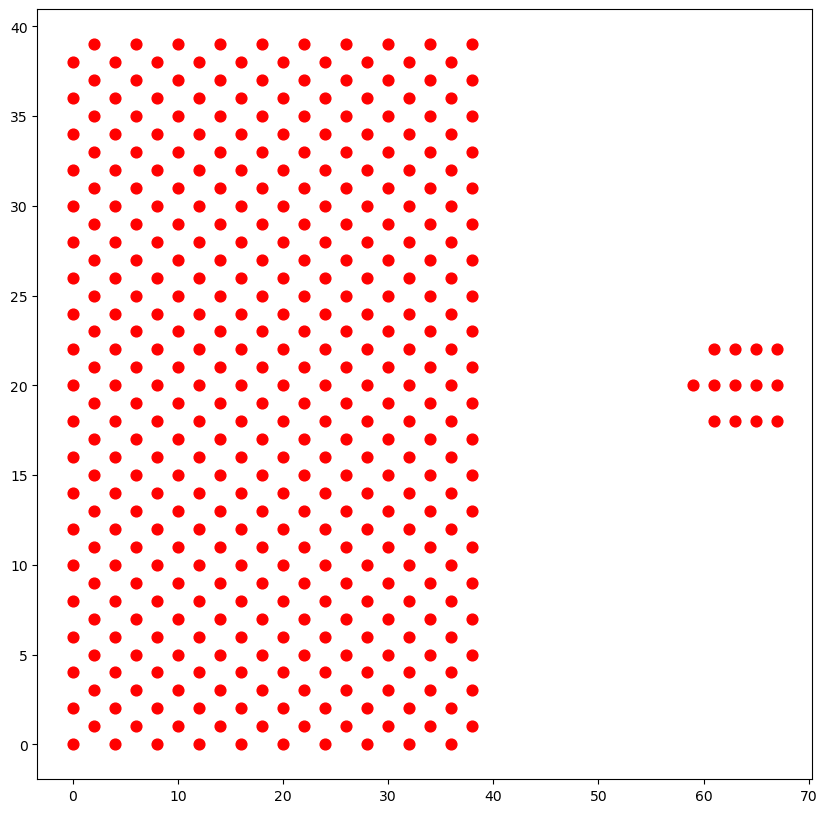

In [24]:
plt.close('all') # close all previous plots

fig, ax = plt.subplots(figsize=(10,10))

mesh = 20
d = 2
mesh_size = mesh*d + 4

t = np.array(df_x.iloc[:,0])
x = np.array(df_x.iloc[0,1:])
y = np.array(df_y.iloc[0,1:])
l = plt.scatter(x, y, s= 10)

# ax = plt.axis([-mesh_size,mesh_size + 4,-mesh_size,mesh_size + 4])

x_all = np.array(df_x.iloc[:,1:])
y_all = np.array(df_y.iloc[:,1:])


redDot = plt.scatter(x_all[0, np.newaxis], y_all[0, np.newaxis], c='r', s=60)

def animate(i):
    data = np.vstack((x_all[np.newaxis, i].reshape(-1), y_all[np.newaxis, i].reshape(-1))).transpose()
    redDot.set_offsets(data)
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=len(t), \
                                      interval=10, blit=True, repeat=True)


plt.show()

f = r"D://Uni//11 semester//c++//ParticleMethod//MPI_particle_project//output//animate_func.gif"
numDataPoints = len(np.linspace(0, 20, 100))
writergif = animation.PillowWriter(fps=numDataPoints/6)
myAnimation.save(f, writer=writergif)